# Medical cost dataset

#### Objective 
The objective of this dataset is to perform a regression task to predict the medical costs incurred by patients 

import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns





### Reading csv file

In [2]:
df = pd.read_csv("/home/taher/IAAA/dataset/insurance.csv")

### exploring data

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

counting male and female

In [6]:
c = 0
for i in df["sex"]:
    if i == "male":
        c +=1
    else:
        None
print(c)
print(1338-c)

676
662


# visualizing data 

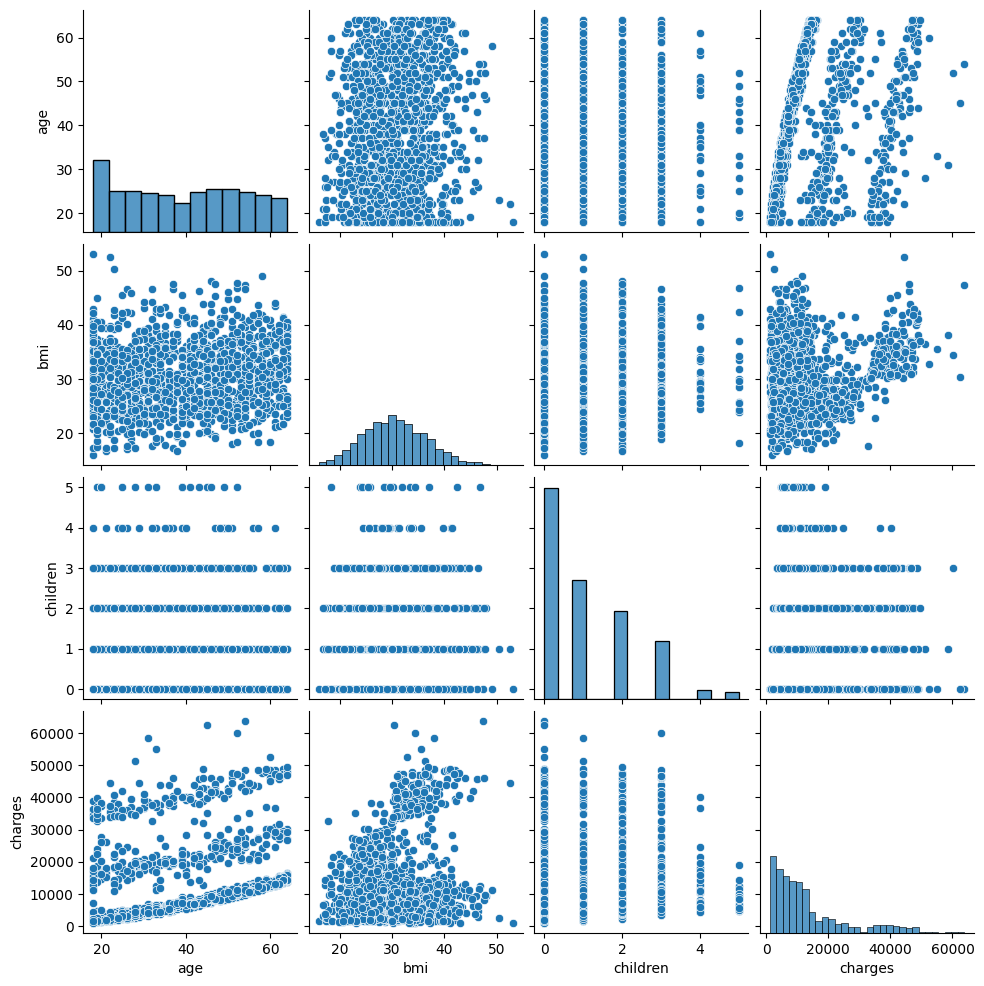

In [7]:
sns.pairplot(df)

## Tasks 1
#### Data preprocessing:
Encode categorical variables ,
handle missing values ,
normalize/standardize features 

Check for null values in the data

In [8]:
bool_series = pd.isnull(df)
print(bool_series)
print(bool_series.sum())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
df[df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


there is no null values

# Encoding

### Label Encoding

Label encoding is simply converting each value in a column to a number

In [10]:
df = df.replace({"yes":1 , "no":0})
df = df.replace({"female":1 , "male":-1})
df

/tmp/ipykernel_30067/85515599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"yes":1 , "no":0})
/tmp/ipykernel_30067/85515599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"female":1 , "male":-1})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,-1,33.770,1,0,southeast,1725.55230
2,28,-1,33.000,3,0,southeast,4449.46200
3,33,-1,22.705,0,0,northwest,21984.47061
4,32,-1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,-1,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


# One Hot Encoding

the basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column

In [11]:
df =  pd.get_dummies(df, columns=["region"])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,-1,33.770,1,0,1725.55230,False,False,True,False
2,28,-1,33.000,3,0,4449.46200,False,False,True,False
3,33,-1,22.705,0,0,21984.47061,False,True,False,False
4,32,-1,28.880,0,0,3866.85520,False,True,False,False


replace false and true white 1 ,0

In [12]:
df= df.replace({True: 1, False: 0})
df.head()

/tmp/ipykernel_30067/4092943430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace({True: 1, False: 0})


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,-1,33.770,1,0,1725.55230,0,0,1,0
2,28,-1,33.000,3,0,4449.46200,0,0,1,0
3,33,-1,22.705,0,0,21984.47061,0,1,0,0
4,32,-1,28.880,0,0,3866.85520,0,1,0,0


In [13]:
df.dtypes

age                   int64
sex                   int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

## normalize features 

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalize = scaler.fit_transform(df)




rebuilding dataset

In [15]:
df_normalize = pd.DataFrame(df_normalize , columns= [	"age"	,"sex"	,"bmi",	"children",	"smoker"	,"charges"	,"region_northeast"	,"region_northwest"	,"region_southeast",	"region_southwest"])

df_normalize.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,1.0,0.321227,0.0,1.0,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.479150,0.2,0.0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,0.0,0.458434,0.6,0.0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,0.0,0.181464,0.0,0.0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,0.0,0.347592,0.0,0.0,0.043816,0.0,1.0,0.0,0.0


# standardize features

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardize = scaler.fit_transform(df)
df_standardize


array([[-1.43876426,  1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545, -0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355, -0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188,  1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573,  1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

rebuilding dataset

In [17]:
df_standardize = pd.DataFrame(df_standardize , columns= [	"age"	,"sex"	,"bmi",	"children",	"smoker"	,"charges"	,"region_northeast"	,"region_northwest"	,"region_southeast",	"region_southwest"])

df_standardize.describe().round(2)# با این تابع اعداد را تا 2 رقم گرد میکنیم
df_standardize.head()



,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,0.298584,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.953689,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-0.728675,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,0.719843,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-0.776802,-0.565267,1.765481,-0.611324,-0.566418


making a pairplpt to see data

In [18]:
#sns.pairplot(df.iloc[:, :6])

#  Exploratory Data Analysis (EDA): 
Analyze the distribution of features, correlations, etc.

In [19]:
correlation_matrix = df.corr()

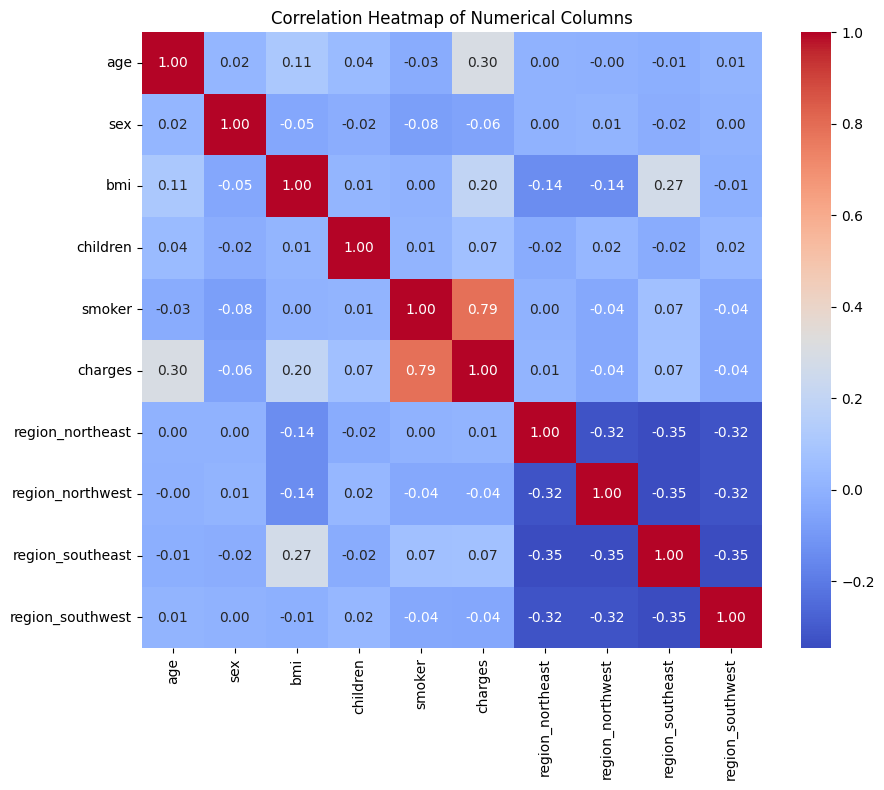

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

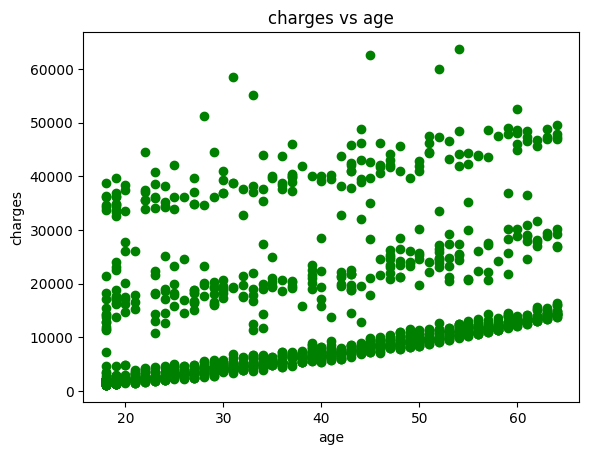

In [21]:

plt.scatter(df['age'], df['charges'], color = 'g')
plt.title('charges vs age')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

Text(0.5, 1.0, 'charges vs bmi')

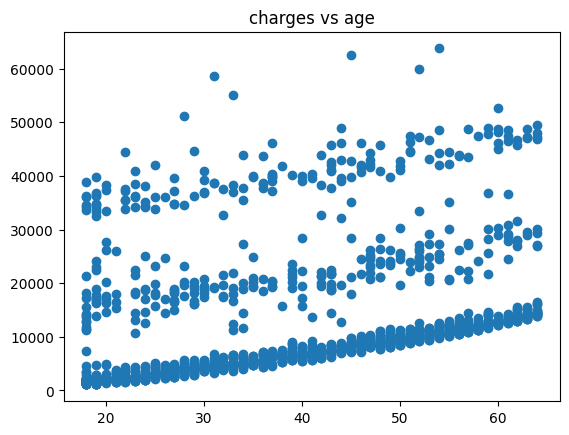

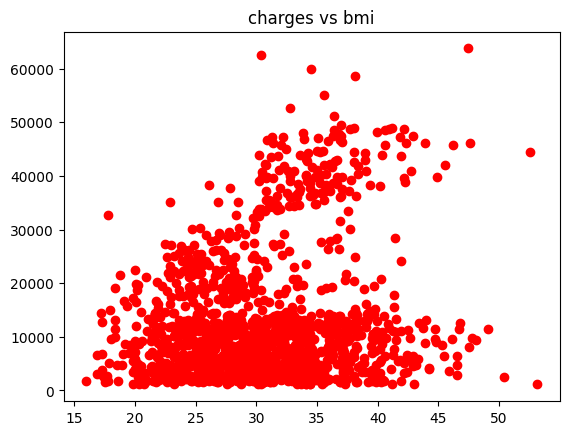

In [22]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(df['age'], df['charges'])
ax1.set_title('charges vs age')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.scatter(df['bmi'], df['charges'] , color="r")
ax2.set_title('charges vs bmi')


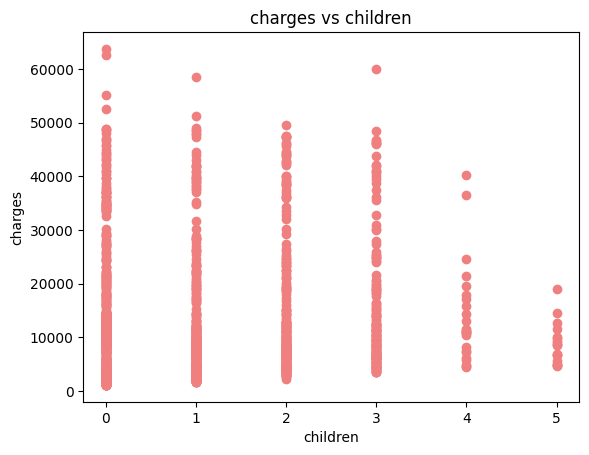

In [23]:
plt.scatter(df['children'], df['charges'], color = 'lightcoral')
plt.title('charges vs children')
plt.xlabel('children')
plt.ylabel('charges')
plt.show()

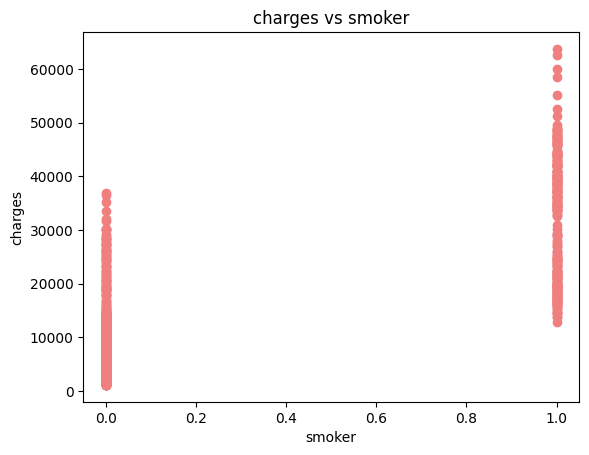

In [24]:

plt.scatter(df['smoker'], df['charges'], color = 'lightcoral')
plt.title('charges vs smoker')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.show()

as it shows charge is not relative to rigen sex children
and we can drop them from dataset

In [25]:
df_normalize.drop(columns=['sex','children','region_northeast',	'region_northwest'	,'region_southeast'	,'region_southwest'])

,age,bmi,smoker,charges
0,0.021739,0.321227,1.0,0.251611
1,0.000000,0.479150,0.0,0.009636
2,0.217391,0.458434,0.0,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.0,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


## Split the dataset 

In [26]:
# Splitting variables
X = df_normalize.drop(columns=['charges'])  # Independent variables
y = df_normalize['charges']  # Dependent variable
"""X = df_normalize[['age']]  # Independent variable
y = df_normalize['charges']  # Dependent variable"""

"X = df_normalize[['age']]  # Independent variable\ny = df_normalize['charges']  # Dependent variable"

##  Splitting dataset into test/train

In [38]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Regressor model

In [28]:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#  Predict the result

In [42]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train
type(y_pred_test)


numpy.ndarray

In [44]:

from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

accuracy = accuracy_score(y_test,pd.Series(y_pred_test) )
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)

ValueError: continuous is not supported

ValueError: x and y must be the same size

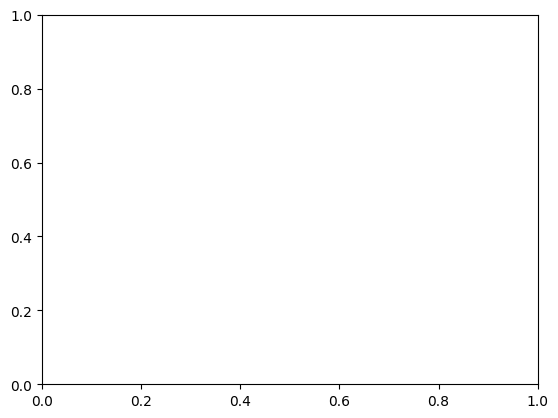

In [288]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()